In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import metrics
from datetime import datetime
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import math
%matplotlib inline
plt.style.use('grayscale')
from scipy.optimize import curve_fit
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
def gen_font(weight, size):
    font1=font0.copy()
    font1.set_family('sans-serif')
    font1.set_weight(weight)
    font1.set_size(size)
    return font1

In [2]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/ckpt.csv')
data = shuffle(data, random_state=0)
X = data[['Checkpoint Size (MB)']]
y = data[['Duration mean (s)']]

In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test = pd.DataFrame([3.45, 4.20, 4.18, 5.65])
X_test = pd.DataFrame([19.21, 40.41, 33.18, 117.61])
regressor = LinearRegression()
# regressor.fit(X_train, y_train)
regressor.fit(X, y)
regressor.score(X,y)

0.922251475149973

In [4]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.4335617237668783)
('Mean Squared Error:', 0.21517413940400637)
('Root Mean Squared Error:', 0.46386866611575134)


In [5]:
regressor.coef_

array([[0.02000607]])

In [6]:
regressor.intercept_

array([3.75119232])

In [8]:
# regressor.fit(X, y)
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.04056549 -0.1970147  -0.10747239 -0.17121856 -0.12107641 -0.13021893
 -0.2840145  -0.00930524 -0.0623471  -0.17749198]
Accuracy: -0.130 (+/- 0.155)
[ 0.57788254 -7.20040365  0.91198183  0.91074115 -4.38117399  0.9471707
  0.          0.          0.          0.        ]
Accuracy: -0.82 (+/- 5.18)


Text(0,0.5,'Checkpoint Duration (s)')

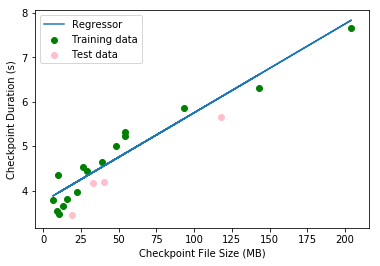

In [9]:
fig, ax = plt.subplots()
ax.plot(X, regressor.fit(X, y).predict(X), label="Regressor")
ax.scatter(X, y, color='g', label="Training data")
ax.scatter(X_test, y_test, color='pink', label="Test data")
plt.legend()
plt.xlabel("Checkpoint File Size (MB)")
plt.ylabel("Checkpoint Duration (s)")

In [206]:
pred = regressor.fit(X, y).predict(X_test)

In [207]:
err = []
err2 = []
tot = 0
for i in range(len(pred)):
    err.append(((pred[i] - y_test.values[i])**2)[0])
    err2.append((((pred[i] - y_test.values[i]))/y_test.values[i])[0])
    tot += ((pred[i] - y_test.values[i])**2)[0]
mse = tot/len(pred)
print err2, mse

[0.19869824989781215, 0.08562802143937813, 0.05621860980252051, 0.08037282369913935] 0.21517413940400637


Text(0,0.5,'Error %')

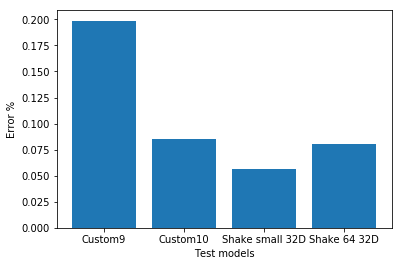

In [208]:
fig, ax = plt.subplots()
ax.bar(np.arange(4), err2)
lables = ['Custom9', 'Custom10', 'Shake small 32D', 'Shake 64 32D']
plt.xticks([0,1,2,3], lables)
plt.xlabel("Test models")
plt.ylabel("Error %")

In [209]:
print math.sqrt(0.21517413940400718)

0.463868666116


In [531]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/unaggregated_training.csv')
data = shuffle(data, random_state=0)
X = data[['Checkpoint Size (MB)']]
# X = data[['Weight File Size']]
y = data[['Duration']]
test = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/unaggregated_test.csv')
test = shuffle(test, random_state=0)
X_test = test[['Checkpoint Size (MB)']]
# X_test = test[['Weight File Size']]
y_test = test[['Duration']]

In [532]:
regressor = LinearRegression()  
# regressor.fit(X_train, y_train)
regressor.fit(X, y)
regressor.score(X,y)

0.8822084138318887

In [533]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.4037693483634319)
('Mean Squared Error:', 0.20268780996126617)
('Root Mean Squared Error:', 0.4502086293722791)


In [534]:
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.33837024 -0.34410418 -0.18252163 -0.43853579 -0.27971588 -0.37859478
 -0.38374929 -0.31820654 -0.37903785 -0.35673133]
Accuracy: -0.340 (+/- 0.132)
[-0.14332426 -0.1540339  -0.05151817 -0.27944742 -0.10467482 -0.16755512
 -0.19342676 -0.14277739 -0.17480415 -0.17326108]
Accuracy: -0.158 (+/- 0.112)
[0.92756622 0.76537106 0.96334515 0.57777433 0.44321905 0.91078767
 0.86821195 0.81729172 0.7953828  0.84052709]
Accuracy: 0.79 (+/- 0.31)


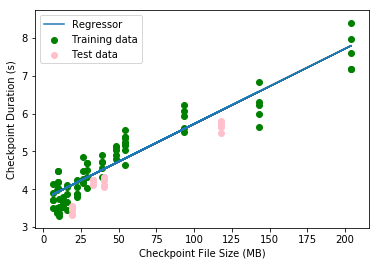

In [535]:
fig, ax = plt.subplots()
ax.plot(X, regressor.fit(X, y).predict(X), label="Regressor")
ax.scatter(X, y, color='g', label="Training data")
ax.scatter(X_test, y_test, color='pink', label="Test data")
plt.legend()
plt.xlabel("Checkpoint File Size (MB)")
plt.ylabel("Checkpoint Duration (s)")
plt.show()

In [395]:
X = data[['Checkpoint Size (MB)']]
# y = data[['Diff']]
y = data[['Local duration']]
X_test = test[['Checkpoint Size (MB)']]
y_test = test[['Local duration']]
# y_test = test[['Diff']]
regressor = LinearRegression()
# regressor.fit(X_train, y_train)
regressor.fit(X, y)
regressor.score(X,y)

0.9029872400356609

In [396]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.4767135518003647)
('Mean Squared Error:', 0.23726936049068081)
('Root Mean Squared Error:', 0.48710302861990173)


In [397]:
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.24340658 -0.24684245 -0.14494708 -0.29945541 -0.19230235 -0.31701795
 -0.18841098 -0.2410124  -0.28719522 -0.25378168]
Accuracy: -0.241 (+/- 0.102)
[-0.10460694 -0.08524005 -0.0255485  -0.166762   -0.04647152 -0.12038967
 -0.05998414 -0.07388813 -0.12014593 -0.10025637]
Accuracy: -0.090 (+/- 0.078)
[0.93462366 0.81499153 0.97256611 0.55952984 0.50784728 0.91213145
 0.93715474 0.86979491 0.77281663 0.87569245]
Accuracy: 0.82 (+/- 0.30)


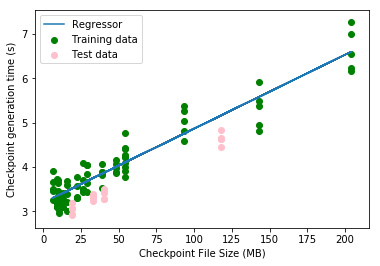

In [291]:
fig, ax = plt.subplots()
ax.plot(X, regressor.fit(X, y).predict(X), label="Regressor")
ax.scatter(X, y, color='g', label="Training data")
ax.scatter(X_test, y_test, color='pink', label="Test data")
plt.legend()
plt.xlabel("Checkpoint File Size (MB)")
plt.ylabel("Checkpoint generation time (s)")
plt.show()

In [547]:
X = data[['Weight File Size','Meta File Size']]
X_old = data[['Weight File Size','Meta File Size','Index File Size']]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_old)
X_new = pca.transform(X_old)
y = data[['Duration']]
# y = data[['Diff']]
X_test = test[['Weight File Size','Meta File Size']]
X_test_old = test[['Weight File Size','Meta File Size','Index File Size']]
X_test_new = pca.transform(X_test_old)
y_test = test[['Duration']]
# y_test = test[['Diff']]
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)
# X_test = scaler.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_new, y)
regressor.score(X_new,y)

0.9314717697473175

In [552]:
y_pred = regressor.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.5617146819610408)
('Mean Squared Error:', 0.32430522973564313)
('Root Mean Squared Error:', 0.5694780327068316)


In [550]:
scores = cross_val_score(regressor, X_new, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_new, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_new, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.28962735 -0.2427415  -0.1612047  -0.3036505  -0.14686246 -0.32958142
 -0.18138244 -0.23895385 -0.27676851 -0.24008645]
Accuracy: -0.241 (+/- 0.117)
[-0.1613499  -0.08530162 -0.03363517 -0.18287115 -0.03153092 -0.13188998
 -0.05957056 -0.06828664 -0.11018416 -0.09140088]
Accuracy: -0.096 (+/- 0.097)
[0.91845636 0.87006607 0.97606879 0.72369438 0.83228234 0.92977706
 0.95941261 0.91261547 0.87102381 0.91587283]
Accuracy: 0.89 (+/- 0.14)


In [392]:
X = data[['Meta File Size', 'Weight File Size']]
y = data[['Local duration']]
X_test = test[['Meta File Size', 'Weight File Size']]
y_test = test[['Local duration']]
regressor = LinearRegression()  
# regressor.fit(X_train, y_train)
regressor.fit(X, y)
regressor.score(X,y)

0.9473593303928303

In [393]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.08437583389259395)
('Mean Squared Error:', 0.00970057530485249)
('Root Mean Squared Error:', 0.09849149864253508)


In [394]:
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.06570368 -0.06130233 -0.03946767 -0.07522341 -0.04582693 -0.04218488
 -0.02660411 -0.04952814 -0.06598586 -0.05374446]
Accuracy: -0.053 (+/- 0.028)
[-0.00779881 -0.00661218 -0.00194547 -0.00805072 -0.00251603 -0.00337611
 -0.00117288 -0.00395765 -0.00639406 -0.00567175]
Accuracy: -0.005 (+/- 0.005)
[0.84721319 0.91775251 0.97764955 0.84411043 0.93892216 0.96408398
 0.98741458 0.90838771 0.91312234 0.92593054]
Accuracy: 0.92 (+/- 0.09)


In [10]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/unaggregated_training.csv')
data = shuffle(data, random_state=0)
X = data[['Checkpoint Size (MB)']]
# X = data[['Weight File Size']]
y = data[['Duration']]
test = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/unaggregated_test.csv')
test = shuffle(test, random_state=0)
X_test = test[['Checkpoint Size (MB)']]
# X_test = test[['Weight File Size']]
y_test = test[['Duration']]
svr = SVR(kernel='rbf', C=10, gamma='auto', epsilon=0.15)
svr.fit(X, y.values.ravel())
scores = cross_val_score(svr, X, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svr, X, y.values.ravel(), cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svr, X, y.values.ravel(), cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print svr.score(X,y)
clf = SVR(kernel='rbf')
grid_values = {'C':[10, 15, 20, 25, 45, 50, 100], 'epsilon':[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]}
grid = GridSearchCV(clf, param_grid = grid_values, scoring='neg_mean_squared_error', cv=10, n_jobs=1)
grid.fit(X,y.values.ravel())
print grid.best_params_


[-0.28074265 -0.24254842 -0.18327257 -0.25871916 -0.16461362 -0.23388811
 -0.20263564 -0.23995862 -0.22813273 -0.31466727]
Accuracy: -0.235 (+/- 0.084)
[-0.18756243 -0.11382136 -0.04183427 -0.10898511 -0.03467237 -0.09394933
 -0.06894579 -0.09092547 -0.06388666 -0.13694556]
Accuracy: -0.094 (+/- 0.087)
[0.90520897 0.82662397 0.97023518 0.83533105 0.8155725  0.94997802
 0.95302495 0.88364519 0.9252174  0.87395262]
Accuracy: 0.89 (+/- 0.11)
0.9469727348449294
{'epsilon': 0.16, 'C': 6}


In [376]:
y_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.7956982284840718)
('Mean Squared Error:', 0.7514001025678428)
('Root Mean Squared Error:', 0.8668333764731506)


In [404]:
###### Below is on the whole trainig + test dataset

In [19]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/whole_data.csv')
X = data[['Checkpoint Size (MB)']]
# y = data[['Diff']]
# y = data[['Local duration']]
y = data[['Duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.36959706 -0.31751964 -0.31159392 -0.27958463 -0.31625147 -0.31951962
 -0.39540776 -0.34211636 -0.46223624 -0.33436957]
Accuracy: -0.345 (+/- 0.099)
[-0.20340424 -0.14434029 -0.12349361 -0.10370702 -0.135024   -0.11367813
 -0.19650127 -0.16336278 -0.26029653 -0.16239079]
Accuracy: -0.161 (+/- 0.091)
[0.70736294 0.87193018 0.78562405 0.68264541 0.32299707 0.93236307
 0.81240677 0.93485062 0.76404215 0.72196929]
Accuracy: 0.75 (+/- 0.33)


('Mean Absolute Error:', 0.3557251723459007)
('Mean Squared Error:', 0.18478576376567102)
('Root Mean Squared Error:', 0.42986714664611325)


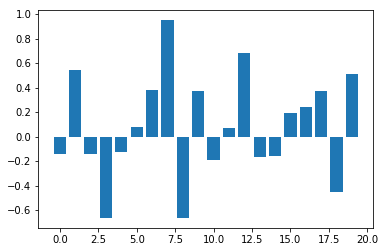

In [20]:
y_pred = regressor.predict(X_test)
gg = []
for i in range(len(y_pred)):
    gg.append((y_pred[i] - y_test.values[i])[0])
plt.bar(np.arange(len(y_pred)),gg)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [94]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/whole_data.csv')
X_uni = data[['Checkpoint Size (MB)']]
X = data[['Weight File Size','Meta File Size']]
X_old = data[['Weight File Size','Meta File Size','Index File Size']]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_old)
X_new = pca.transform(X_old)
y = data[['Duration']]
# y = data[['Diff']]
# y = data[['Local duration']]
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.36959706 -0.31751964 -0.31159392 -0.27958463 -0.31625147 -0.31951962
 -0.39540776 -0.34211636 -0.46223624 -0.33436957]
Accuracy: -0.345 (+/- 0.099)
[-0.20340424 -0.14434029 -0.12349361 -0.10370702 -0.135024   -0.11367813
 -0.19650127 -0.16336278 -0.26029653 -0.16239079]
Accuracy: -0.161 (+/- 0.091)
[0.70736294 0.87193018 0.78562405 0.68264541 0.32299707 0.93236307
 0.81240677 0.93485062 0.76404215 0.72196929]
Accuracy: 0.75 (+/- 0.33)


In [97]:
y_pred = regressor.predict(X_test)
res32 = [[15.99]]
res32_pred = regressor.predict(res32)
print (res32_pred)
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[3.96029145]]
('Mean Absolute Percentage Error:', 7.979580330600075)
('Mean Absolute Error:', 0.3557251723459007)
('Mean Squared Error:', 0.18478576376567102)
('Root Mean Squared Error:', 0.42986714664611325)


In [78]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/whole_data.csv')
X = data[['Checkpoint Size (MB)']]
y = data[['Duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# y = data[['Diff']]
# y = data[['Local duration']]
svr = SVR(kernel='rbf', C=10, gamma='auto', epsilon=0.14)
svr.fit(X_train, y_train.values.ravel())
scores = cross_val_score(svr, X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
print scores
print("MAE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svr, X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
print scores
print("MSE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svr, X_train, y_train.values.ravel(), cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = SVR(kernel='rbf')
grid_values = {'C':[10, 15, 20, 25, 45, 50, 100], 'epsilon':[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]}
grid = GridSearchCV(clf, param_grid = grid_values, scoring='neg_mean_absolute_error', cv=10, n_jobs=1)
then = datetime.now()
grid.fit(X_train,y_train.values.ravel())
now = datetime.now()
print now-then
print grid.best_params_

[-0.13614524 -0.20841152 -0.18384494 -0.15254899 -0.14624846 -0.15771814
 -0.14872499 -0.36872616 -0.24757137 -0.23092211]
MAE: -0.198 (+/- 0.135)
[-0.03625307 -0.06823899 -0.05568645 -0.04448409 -0.03689084 -0.03069373
 -0.03790599 -0.2466622  -0.07118963 -0.09034186]
MSE: -0.072 (+/- 0.122)
[0.94784282 0.93945311 0.90333236 0.86387391 0.81503133 0.98173765
 0.96381241 0.90163066 0.93546686 0.8453249 ]
Accuracy: 0.91 (+/- 0.10)
0:00:02.400299
{'epsilon': 0.14, 'C': 10}


In [91]:
y_pred = svr.predict(X_test)
res32 = [[204.04]]
res32_pred = svr.predict(res32)
print (res32_pred)
# gg = []
# for i in range(len(y_pred)):
#     gg.append((y_pred[i] - y_test.values[i])[0])
# plt.bar(np.arange(len(y_pred)),gg)
new_pred = []
for i in range(len(y_pred)):
    new_pred.append([y_pred[i]])
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, new_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[7.46013529]
('Mean Absolute Percentage Error:', 5.381931266877247)
('Mean Absolute Error:', 0.24505200431974763)
('Mean Squared Error:', 0.09701218572025269)
('Root Mean Squared Error:', 0.3114677924284511)


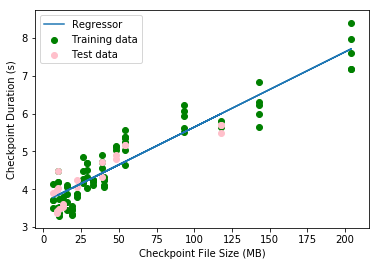

In [10]:
fig, ax = plt.subplots()
regressor = LinearRegression()
# regressor.fit(X_train, y_train)
regressor.fit(X, y)
regressor.score(X,y)
ax.plot(X, regressor.fit(X, y).predict(X), label="Regressor")
ax.scatter(X_train, y_train, color='g', label="Training data")
ax.scatter(X_test, y_test, color='pink', label="Test data")
plt.legend()
plt.xlabel("Checkpoint File Size (MB)")
plt.ylabel("Checkpoint Duration (s)")
plt.show()

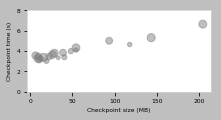

In [24]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/checkpoint/aggregated.csv')
# data = shuffle(data, random_state=0)
font = gen_font('light',6)
font2 = gen_font('light',5)
X = data[['Checkpoint Size (MB)']]
y = data[['Duration mean (s)']]
cv = data[['Coefficient of variation']]
fig, ax = plt.subplots(figsize=(3.3,1.5))
# ax.plot(X, regressor.fit(X, y).predict(X), label="Regressor")
ax.scatter(X, y, s=cv*800, color='gray', label="Training data", alpha=.5)
# ax.scatter(X_test, y_test, color='pink', label="Test data")
# plt.legend()
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.setp(ax.spines.values(), color='lightgray')
plt.ylim(0,8)
plt.xlabel("Checkpoint size (MB)", fontproperties=font)
plt.ylabel("Checkpoint time (s)", fontproperties=font)
fig.savefig("/Users/ozymandias/Desktop/ckpt_duration_size_correlation.pdf", bbox_inches='tight')